<a href="https://colab.research.google.com/github/Calabras/obrabotka_izobrajheniy/blob/main/DE_IP_2024_Task_1_Shilin_ND_3823B1PR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [ ]:
image = cv2.imread('sar_2_color.jpg')

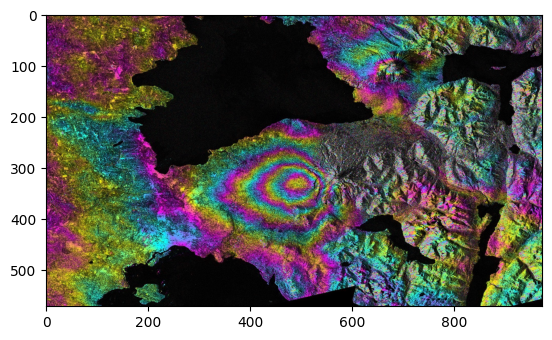

In [ ]:
plt.imshow(image)

In [ ]:
image.shape # h,w,c

(572, 974, 3)

In [ ]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [ ]:
# ROI
img_roi = image[100:200, 500:700]

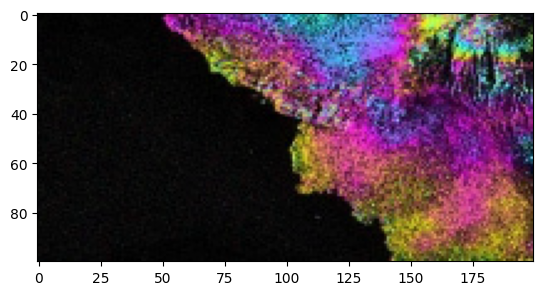

In [ ]:
plt.imshow(img_roi)

In [ ]:
b,g,r = cv2.split(image)

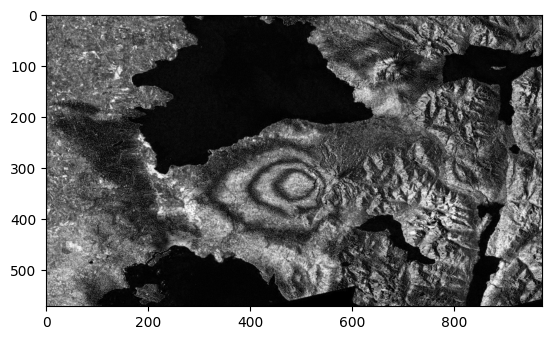

In [ ]:
plt.imshow(b, cmap = 'gray')

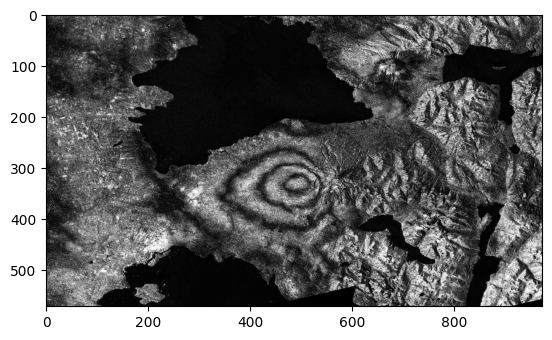

In [ ]:
plt.imshow(g, cmap = 'gray')

In [ ]:
# alternative approach
b = image[:,:,0]

In [ ]:
import copy

image2 = copy.deepcopy(image)

In [ ]:
image2[50:100,50:100] = [0,0,0]

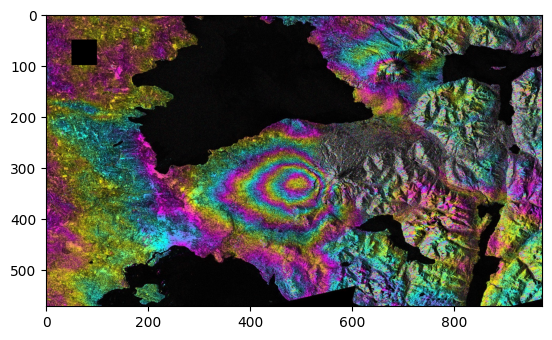

In [ ]:
plt.imshow(image2)

In [ ]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

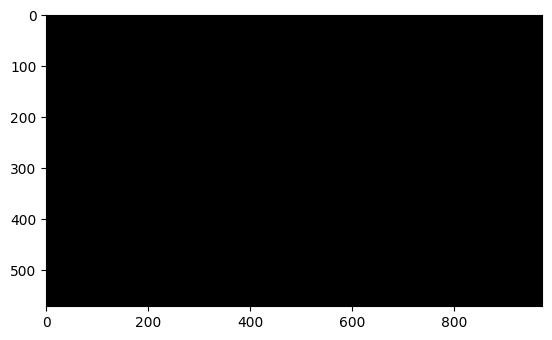

In [ ]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [ ]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
image_gray[0,0]

np.uint8(40)

In [ ]:
image_gray.shape

(572, 974)

In [ ]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [ ]:
image_hsv.shape

(572, 974, 3)

In [ ]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [ ]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [ ]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [ ]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [ ]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

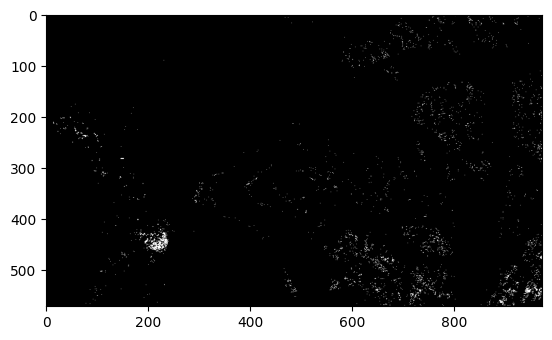

In [ ]:
plt.imshow(thresh1, cmap='gray')

In [ ]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [ ]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

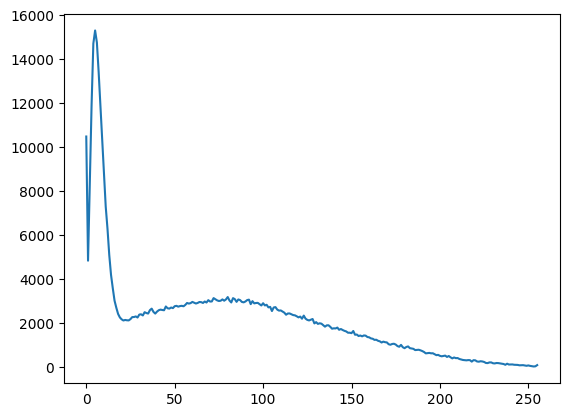

In [ ]:
plt.plot(b_hist)

In [ ]:
b_hist_cum = b_hist.cumsum()

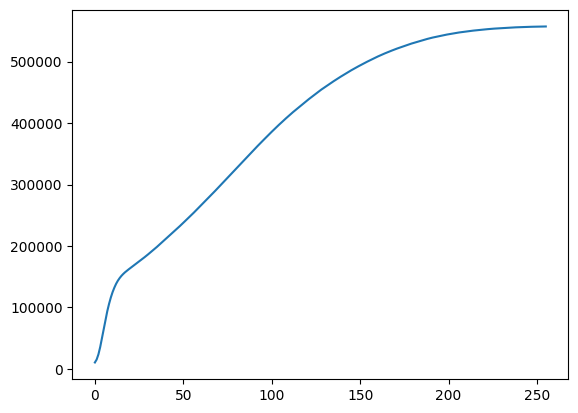

In [ ]:
plt.plot(b_hist_cum)

In [ ]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

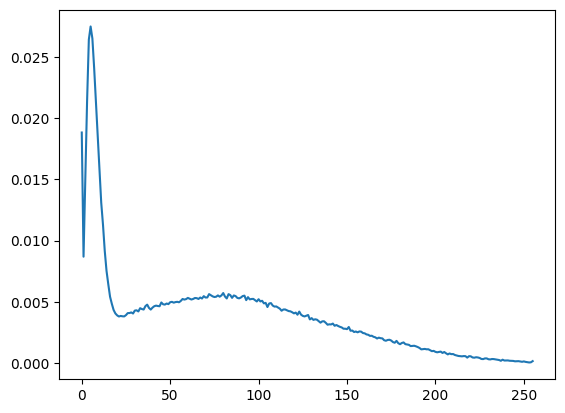

In [ ]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [ ]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


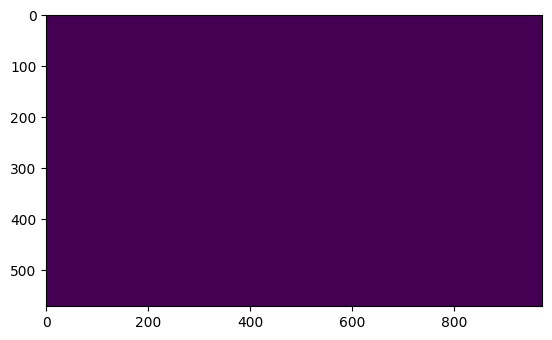

In [ ]:
plt.imshow(diff)

In [ ]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [ ]:
mean = image_gray.mean()

In [ ]:
std = image_gray.std()

In [ ]:
print(mean,std)

67.41225535245043 52.016191875959635


In [ ]:
eq_gray = cv2.equalizeHist(image_gray)

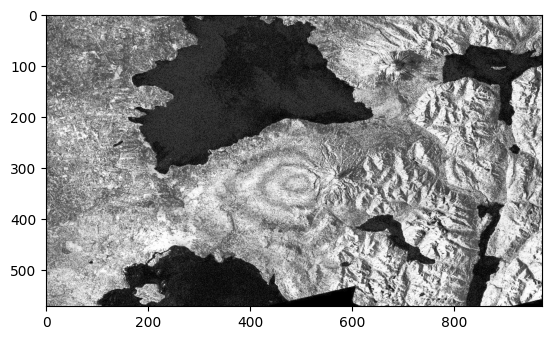

In [ ]:
plt.imshow(eq_gray, cmap="gray")


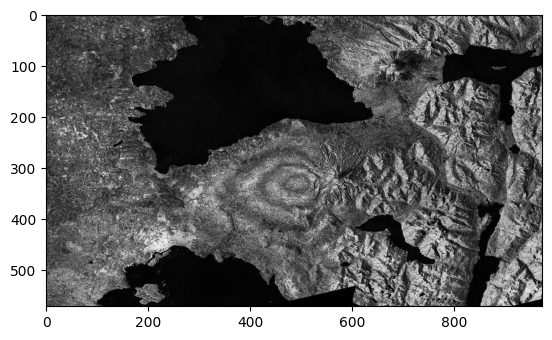

In [ ]:
plt.imshow(image_gray, cmap="gray")

#Домашнее задание

In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


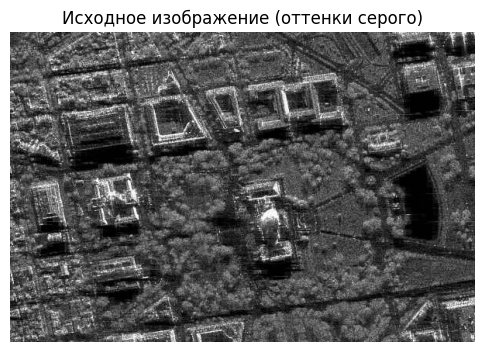

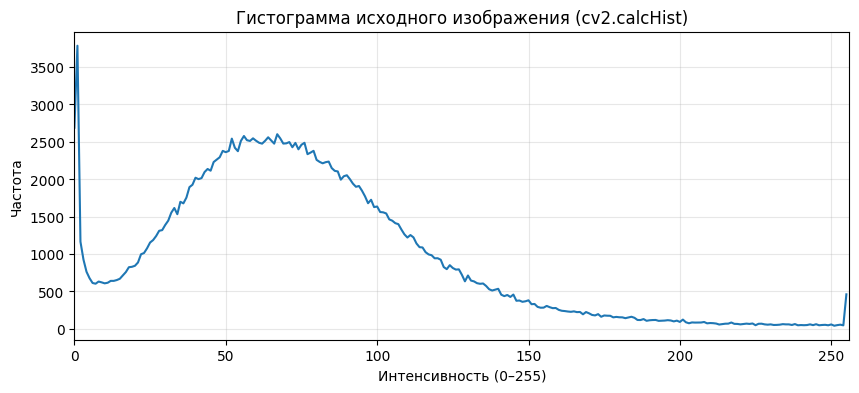

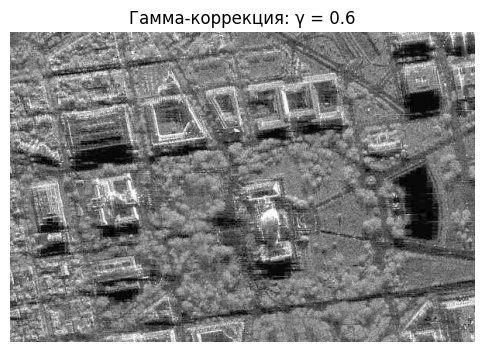

Сравнение с исходным (γ = 0.6) — MSE: 1784.27 | SSIM: 0.8535


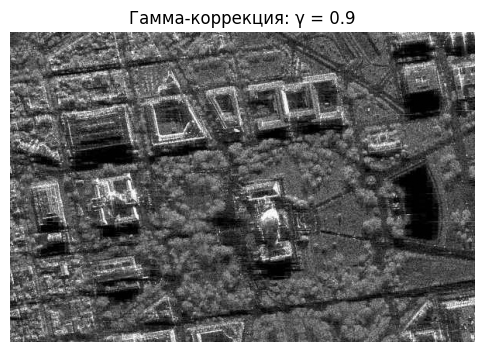

Сравнение с исходным (γ = 0.9) — MSE: 65.61 | SSIM: 0.9912


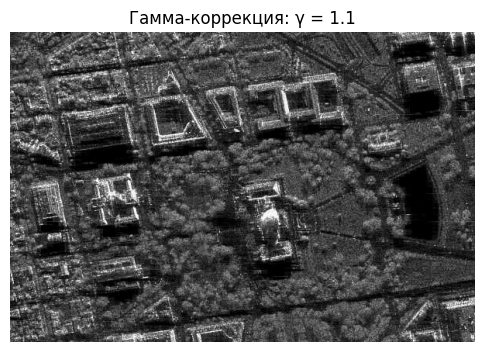

Сравнение с исходным (γ = 1.1) — MSE: 64.54 | SSIM: 0.9869


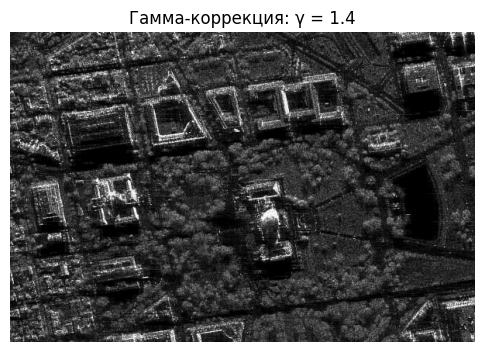

Сравнение с исходным (γ = 1.4) — MSE: 696.04 | SSIM: 0.8633
Статистика исходного: среднее = 74.94, σ = 43.66
Статистика eq_gray:   среднее = 127.03, σ = 74.27


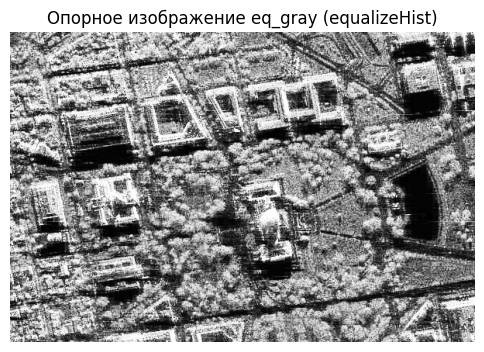

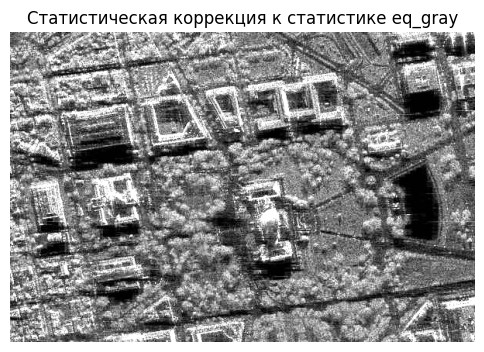

Статистическая коррекция — против исходного — MSE: 2946.70 | SSIM: 0.7862
Статистическая коррекция — против eq_gray — MSE: 247.70 | SSIM: 0.9500


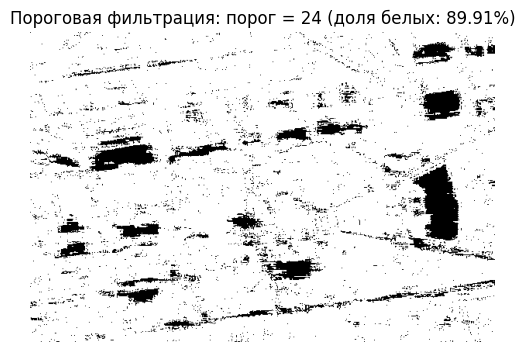

Бинаризация с порогом 24 — против исходного — MSE: 28281.08 | SSIM: 0.1156


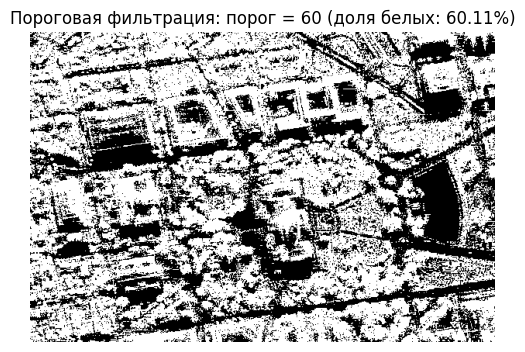

Бинаризация с порогом 60 — против исходного — MSE: 15718.77 | SSIM: 0.2611


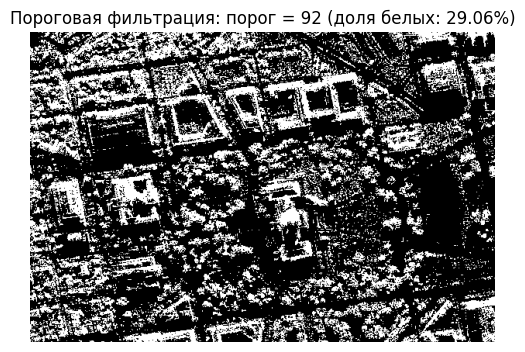

Бинаризация с порогом 92 — против исходного — MSE: 7528.89 | SSIM: 0.3009


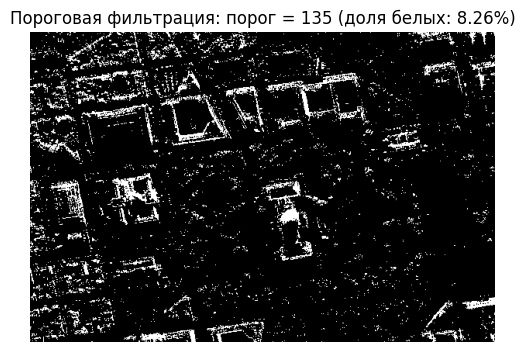

Бинаризация с порогом 135 — против исходного — MSE: 5646.39 | SSIM: 0.1618


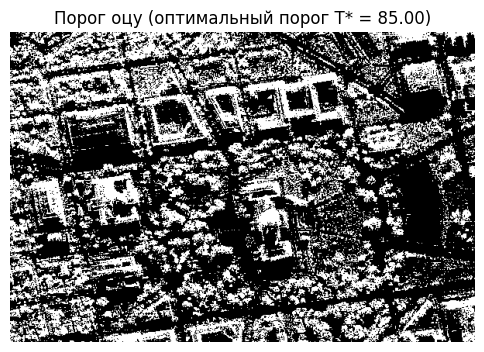

Бинаризация по оцу — против исходного — MSE: 8695.72 | SSIM: 0.3064


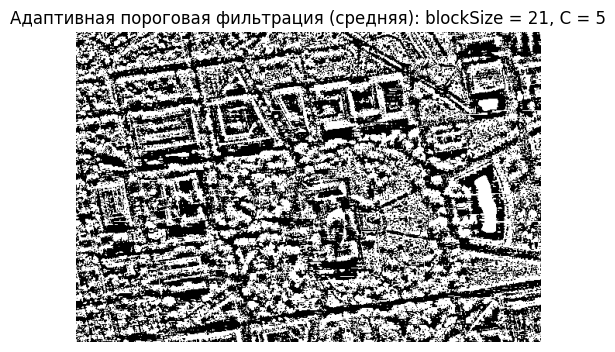

Адаптивная (средняя) — против исходного — MSE: 13728.95 | SSIM: 0.2917


(np.float64(13728.950708333334), np.float64(0.29173447102054206))

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

#одноканальное (градации серого) изображение
def show_gray(img, title='', size=(6, 6)):
    plt.figure(figsize=size)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)  # заголовок — строго на русском
    plt.axis('off')
    plt.show()

#гистограмма яркостей
def plot_hist_cv(gray_u8, title='Гистограмма'):
    hist = cv2.calcHist([gray_u8], [0], None, [256], [0, 256])
    plt.figure(figsize=(10, 4))
    plt.plot(hist, linewidth=1.5)
    plt.title(title)
    plt.xlabel('Интенсивность (0–255)')
    plt.ylabel('Частота')
    plt.xlim([0, 256])
    plt.grid(True, alpha=0.3)
    plt.show()

#среднеквадратичная ошибка (MSE) между двумя изображениями
def calculate_mse(a, b):
    a = a.astype(np.float64)
    b = b.astype(np.float64)
    return np.mean((a - b) ** 2)

#сравнение двух изображений метриками MSE и SSIM
def compare_images(original_u8, processed_u8, label=''):
    a = original_u8.astype(np.float64)
    b = processed_u8.astype(np.float64)
    dr = float(max(a.max(), b.max()) - min(a.min(), b.min()))
    if dr == 0:
        dr = 1.0
    mse_val  = calculate_mse(a, b)
    ssim_val = ssim(a, b, data_range=dr)
    print(f'{label} — MSE: {mse_val:.2f} | SSIM: {ssim_val:.4f}')
    return mse_val, ssim_val

#гамма-коррекция для изображения uint8 в градациях серого
def gamma_correction_u8(gray_u8, gamma):
    g = np.clip(gray_u8.astype(np.float32) / 255.0, 0.0, 1.0)
    out = np.power(g, gamma)
    out = np.clip(out * 255.0, 0, 255).astype(np.uint8)
    return out

gamma_correction = gamma_correction_u8

#статистическая коррекция яркости
def match_mean_std_by_reference(src_u8, ref_u8):
    src = src_u8.astype(np.float32)
    ref = ref_u8.astype(np.float32)

    m_src, s_src = float(src.mean()), float(src.std())
    m_ref, s_ref = float(ref.mean()), float(ref.std())

    if s_src < 1e-6:
        s_src = 1.0

    scale = s_ref / s_src
    out = (src - m_src) * scale + m_ref
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

#бинарная пороговая фильтрация с фиксированным порогом
def threshold_binary_u8(gray_u8, thr):
    _, bin_img = cv2.threshold(gray_u8, thr, 255, cv2.THRESH_BINARY)
    return bin_img

image_path = 'sar_1_gray.jpg'
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if gray is None:
    raise FileNotFoundError(f'Не удалось загрузить файл: {image_path}')

show_gray(gray, 'Исходное изображение (оттенки серого)')
plot_hist_cv(gray, 'Гистограмма исходного изображения (cv2.calcHist)')

#гамма-коррекция для γ<1 и γ>1
gamma_values = [0.6, 0.9, 1.1, 1.4]

for gam in gamma_values:
    gimg = gamma_correction(gray, gam)
    show_gray(gimg, f'Гамма-коррекция: γ = {gam}')
    compare_images(gray, gimg, label=f'Сравнение с исходным (γ = {gam})')

#статистическая «цветокоррекция» на основе статистики eq_gray
eq_gray = cv2.equalizeHist(gray)
mean_src, std_src = gray.mean(), gray.std()
mean_eq,  std_eq  = eq_gray.mean(), eq_gray.std()
print(f'Статистика исходного: среднее = {mean_src:.2f}, σ = {std_src:.2f}')
print(f'Статистика eq_gray:   среднее = {mean_eq:.2f}, σ = {std_eq:.2f}')

#линейная подгонка «под статистику eq_gray»
stat_corr = match_mean_std_by_reference(gray, eq_gray)

#опорное eq_gray и результат статистической коррекции
show_gray(eq_gray, 'Опорное изображение eq_gray (equalizeHist)')
show_gray(stat_corr, 'Статистическая коррекция к статистике eq_gray')

compare_images(gray, stat_corr, label='Статистическая коррекция — против исходного')
compare_images(eq_gray, stat_corr, label='Статистическая коррекция — против eq_gray')

#пороговая фильтрация с различными параметрами
thresholds = [24, 60, 92, 135]
for thr in thresholds:
    timg = threshold_binary_u8(gray, thr)
    white_ratio = timg.mean() / 255.0
    show_gray(timg, f'Пороговая фильтрация: порог = {thr} (доля белых: {white_ratio:.2%})')
    compare_images(gray, timg, label=f'Бинаризация с порогом {thr} — против исходного')

#оцу (автоматический выбор порога)
thr_otsu, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_gray(otsu, f'Порог оцу (оптимальный порог T* = {thr_otsu:.2f})')
compare_images(gray, otsu, label='Бинаризация по оцу — против исходного')

#адаптивная (средняя)
adap = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=21,
    C=5
)
show_gray(adap, 'Адаптивная пороговая фильтрация (средняя): blockSize = 21, C = 5')
compare_images(gray, adap, label='Адаптивная (средняя) — против исходного')
